In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('../data/multiTimeline.csv', skiprows=1)
df.head()

,2004-01,100,31,48
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [3]:
#컬럼명
df.columns=['month','diet','gym','finance']
df.head()

,month,diet,gym,finance
0,2004-02,76,26,48
1,2004-03,68,24,47
2,2004-04,70,22,47
3,2004-05,73,23,43
4,2004-06,66,24,44


In [5]:
df.month=pd.to_datetime(df.month)
df

,month,diet,gym,finance
0,2004-02-01,76,26,48
1,2004-03-01,68,24,47
2,2004-04-01,70,22,47
3,2004-05-01,73,23,43
4,2004-06-01,66,24,44
...,...,...,...,...
173,2018-07-01,54,52,45
174,2018-08-01,50,52,48
175,2018-09-01,48,51,46
176,2018-10-01,46,47,48


In [7]:
#index 설정
df.set_index('month', inplace=True)
df.head()

,diet,gym,finance
month,,,
2004-02-01,76,26,48
2004-03-01,68,24,47
2004-04-01,70,22,47
2004-05-01,73,23,43
2004-06-01,66,24,44


<AxesSubplot:xlabel='month'>

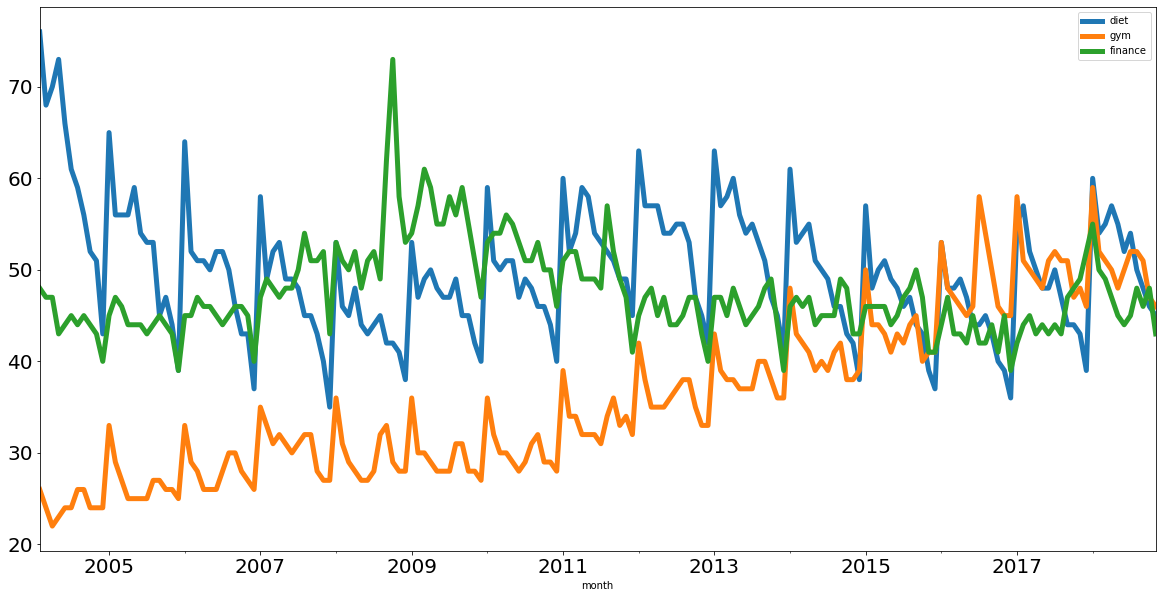

In [12]:
#3개의 컬럼에 대한 시계열 곡선

df.plot(figsize=(20,10),linewidth=5, fontsize=20)


Text(0.5, 0, 'Year')

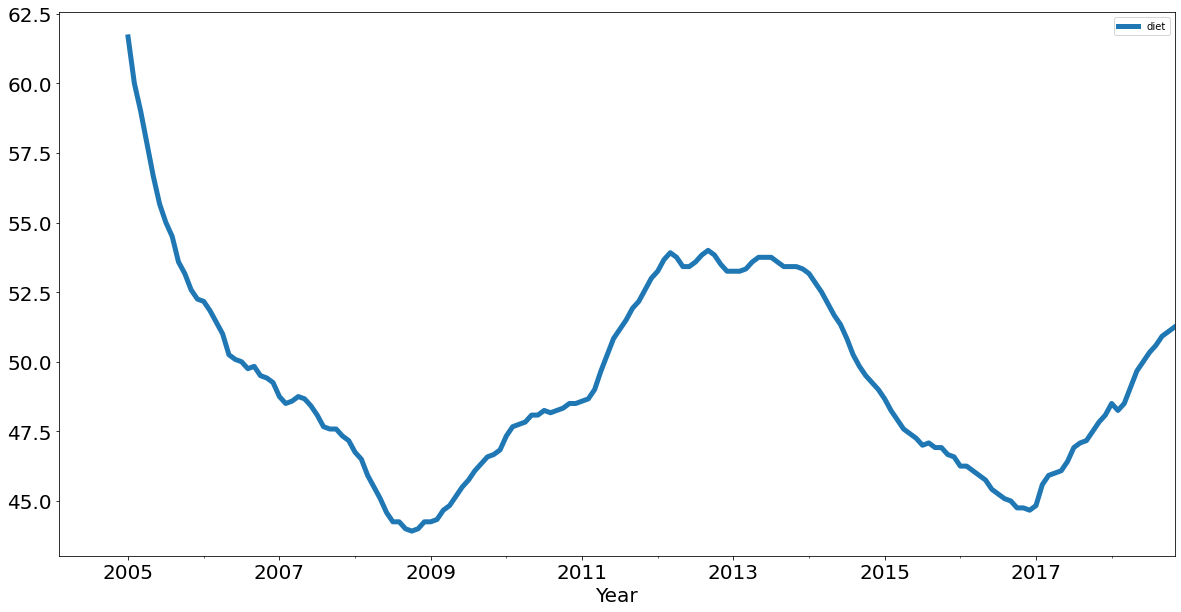

In [13]:
#12사이즈 이동평균
diet=df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

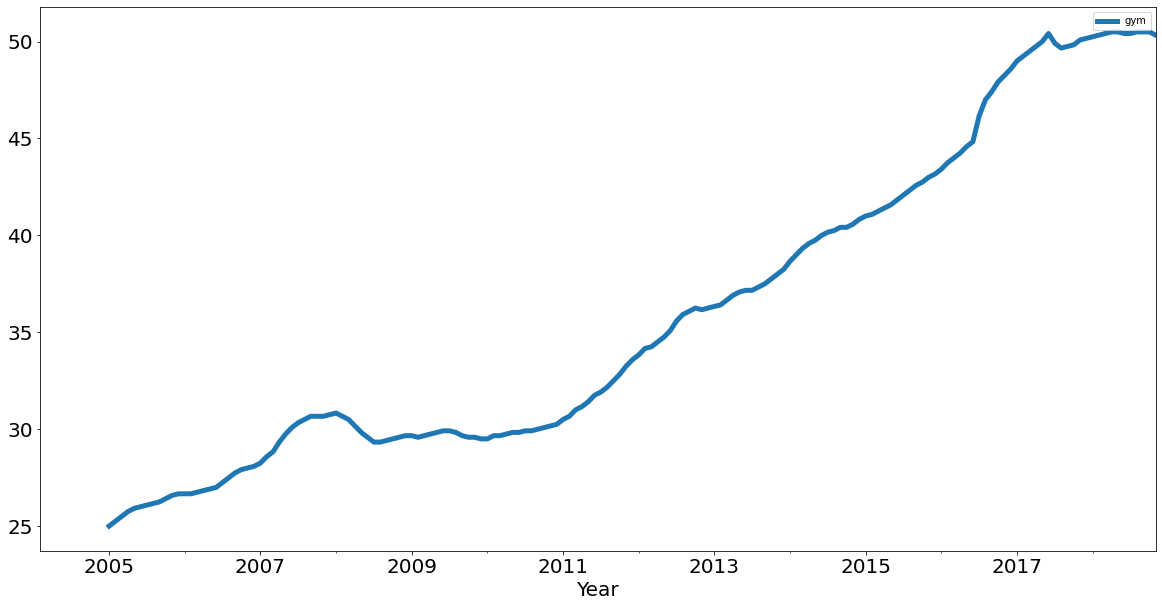

In [16]:
gym=df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

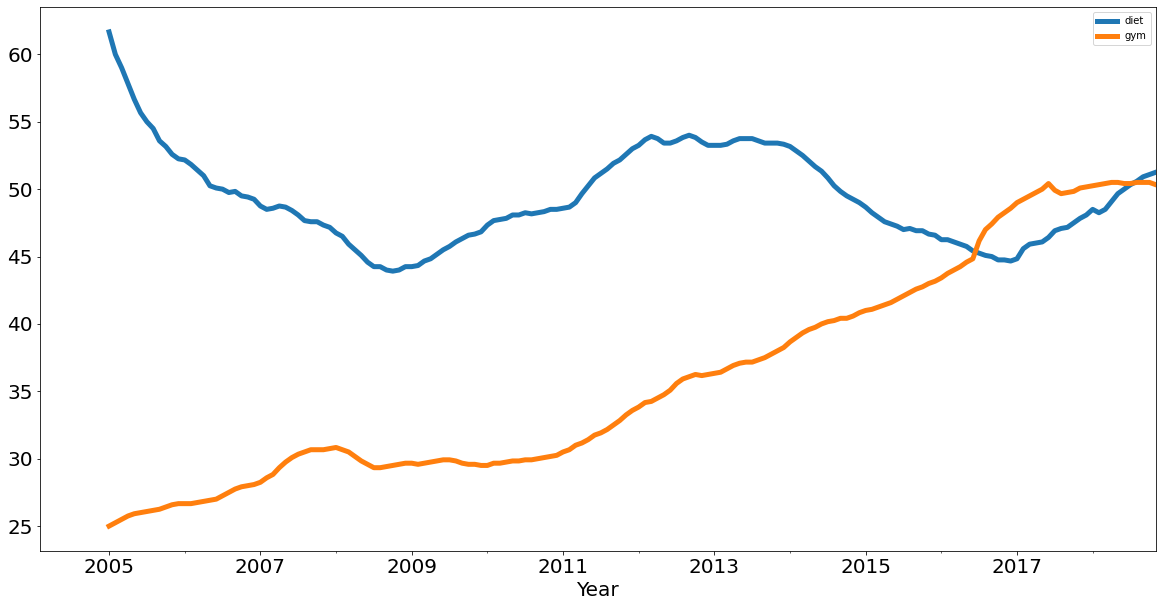

In [19]:
diet_gym=pd.concat([diet.rolling(12).mean(),gym.rolling(12).mean()], axis=1)
diet_gym.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Year', fontsize=20)

Text(0.5, 0, 'Year')

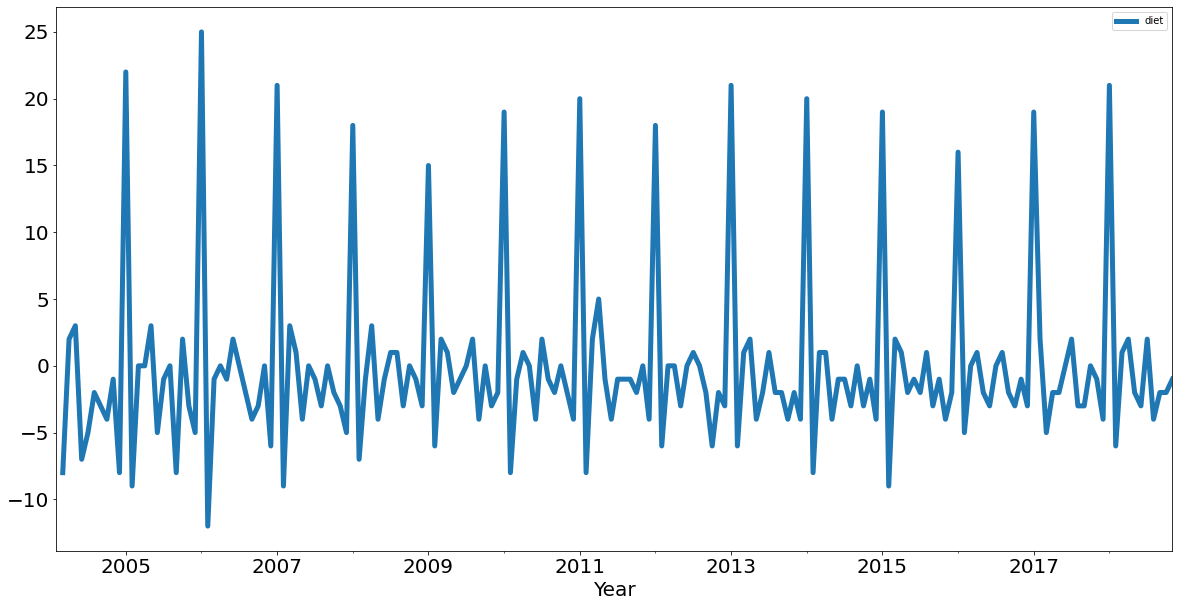

In [20]:
#다이어트 곡선에 대한 차분 그래프

diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

#결과해석
#차분한 결과, 비정상성 곡선 >> 정상성 띈 곡선으로 변경 확인
#평균, 분산이 일정해짐

In [21]:
#컬럼 간 상관관계 행렬
df.corr()
#gym과 finace가 역의 상관관계(-22%)

,diet,gym,finance
diet,1.000000,-0.039623,-0.041780
gym,-0.039623,1.000000,-0.229946
finance,-0.041780,-0.229946,1.000000


Text(0.5, 0, 'Year')

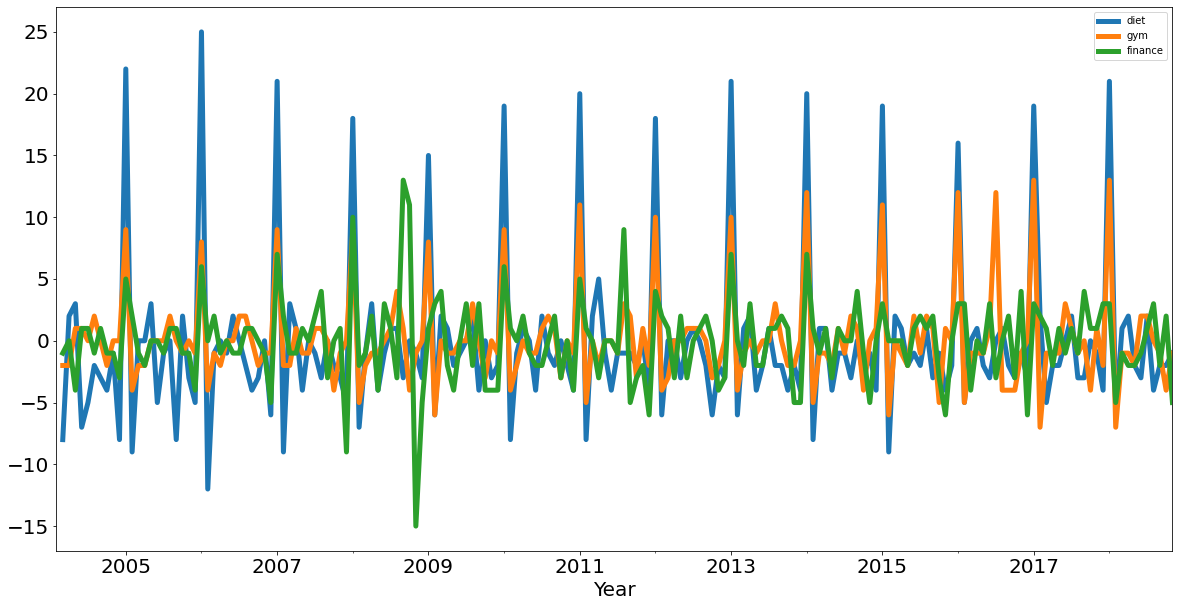

In [22]:
#3개의 속성에 대한 차분 그래프 그리기

df.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
#전반적으로 비슷한 수준을 보임

In [23]:
#차분에 대한 상관관계 행렬

df.diff().corr()
#diet 변하면 gym도 쉽겨 반함

,diet,gym,finance
diet,1.000000,0.800682,0.397953
gym,0.800682,1.000000,0.342698
finance,0.397953,0.342698,1.000000
